<a href="https://colab.research.google.com/github/sharaddobariya05/HSI-classification-/blob/master/KSC_HSI_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import plotly.express as px
import seaborn as sns
sns.axes_style('whitegrid');
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
cd '/content/gdrive/My Drive/hsi/data'

/content/gdrive/My Drive/hsi/data


In [4]:
from scipy.io import loadmat

def read_HSI():
  X = loadmat('KSC.mat')['KSC']
  y = loadmat('KSC_gt.mat')['KSC_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (512, 614, 176)
y shape: (512, 614)


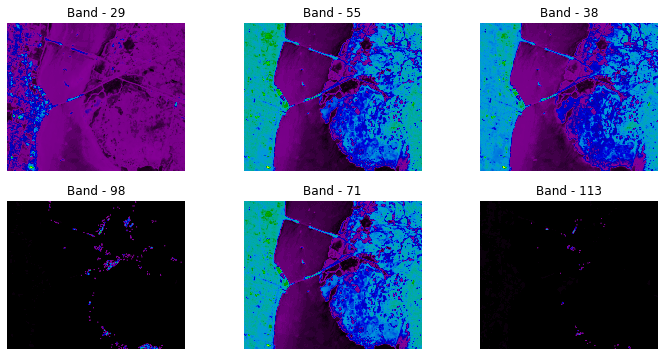

In [5]:
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
#plt.savefig('IP_Bands.png')

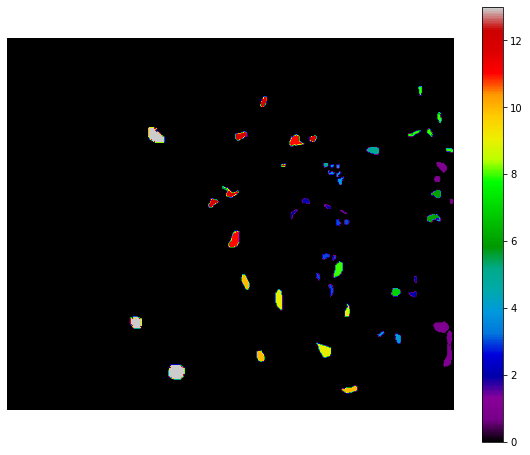

In [6]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
#plt.savefig('IP_GT.png')
plt.show()

In [7]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df
  
df = extract_pixels(X, y)

In [8]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band138,band139,band140,band141,band142,band143,band144,band145,band146,band147,band148,band149,band150,band151,band152,band153,band154,band155,band156,band157,band158,band159,band160,band161,band162,band163,band164,band165,band166,band167,band168,band169,band170,band171,band172,band173,band174,band175,band176,class
0,11,26,19,16,20,25,27,33,36,39,42,43,50,56,57,60,57,54,56,56,59,56,58,59,59,58,57,57,57,57,62,71,94,118,138,160,180,192,184,195,...,90,85,96,95,98,97,100,99,98,100,99,104,108,109,101,110,112,109,101,94,93,88,87,84,78,83,79,81,77,71,75,75,74,70,74,63,63,64,58,0
1,4,22,10,7,11,14,19,24,25,29,32,32,37,43,46,46,44,41,42,40,42,40,40,41,42,40,38,37,37,35,40,50,70,96,118,145,163,179,170,181,...,57,59,62,65,60,61,64,65,66,67,70,69,70,75,75,75,73,76,70,66,60,61,58,60,57,52,47,54,45,47,47,45,54,44,47,47,38,44,43,0
2,6,16,9,7,12,15,16,22,24,26,30,30,35,40,41,42,41,38,38,38,40,39,37,38,39,37,37,35,32,31,34,42,62,85,106,132,152,168,156,167,...,66,68,68,71,70,72,68,75,75,77,79,84,79,86,83,89,85,86,85,80,75,66,68,66,60,60,59,60,62,59,56,70,59,59,63,59,48,47,49,0
3,19,33,21,18,24,26,30,37,39,44,47,46,51,57,59,62,60,58,61,61,65,65,67,67,71,70,72,71,64,64,69,77,91,107,121,136,146,158,153,159,...,139,142,146,145,144,146,142,148,153,155,158,156,164,170,165,170,171,162,164,154,144,136,135,130,115,128,121,120,121,113,116,116,122,117,115,116,103,113,89,0
4,17,39,31,28,35,39,41,49,52,55,62,64,71,77,80,82,81,79,83,84,88,87,89,90,95,94,95,95,95,94,98,111,132,156,172,191,207,220,211,222,...,186,194,199,203,204,206,204,212,215,219,216,223,227,230,230,235,237,236,220,210,198,186,183,183,171,173,163,168,160,145,165,167,169,156,158,154,147,140,123,0


In [9]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band137,band138,band139,band140,band141,band142,band143,band144,band145,band146,band147,band148,band149,band150,band151,band152,band153,band154,band155,band156,band157,band158,band159,band160,band161,band162,band163,band164,band165,band166,band167,band168,band169,band170,band171,band172,band173,band174,band175,band176
count,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.00000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,...,314368.000000,314368.000000,314368.00000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000,314368.000000
mean,1458.848995,34.780630,28.230567,30.532287,31.271503,33.324925,34.89888,39.064227,40.316050,42.478582,45.002488,44.543983,48.945895,52.867480,54.326061,55.919349,55.006950,53.443404,54.735231,54.301510,55.311695,53.734642,53.630980,53.861703,54.997633,53.140348,52.194094,50.773775,50.209974,49.351305,52.037625,58.755888,70.694813,82.331421,89.835107,99.489261,107.890520,115.743336,111.149538,116.617388,...,383.048939,253.923084,341.47335,423.735367,340.924719,291.248950,289.439679,286.974648,246.590235,192.755630,244.029796,205.675654,268.535159,212.828666,238.192287,148.251959,233.950529,183.263758,163.015278,279.294798,275.240110,352.365670,359.375999,550.420491,465.859086,502.354511,432.442704,528.549878,427.274487,389.558107,412.564094,679.135465,442.845627,689.850704,794.370671,540.067310,596.199216,1574.710215,904.875407,1424.507959
std,9614.216153,17.146995,118.113793,509.573301,18.868027,19.745287,20.51392,21.772768,22.711327,23.827604,24.936864,25.078395,26.108373,27.099651,27.595852,28.209136,28.277103,28.347365,29.368826,29.843471,31.096349,31.202560,31.618089,32.203358,33.370474,33.580876,34.506365,34.616306,34.085830,34.399941,34.838829,35.456786,40.283525,48.462946,57.059792,67.979981,76.507882,82.813249,79.003582,84.302307,...,4584.954515,3569.654911,4272.12968,4838.185710,4243.449651,3840.030932,3822.340724,3797.437311,3425.979225,2860.383603,3394.124900,2997.093337,3614.562803,3053.141431,3306.981615,2266.482212,3253.177036,2698.956735,2448.139454,3708.882182,3696.190573,4345.802964,4412.264100,5654.347399,5159.451299,5399.301804,4955.751265,5561.344654,4929.933346,4694.522109,4866.854418,6380.082698,5039.451678,6430.050312,6943.456348,5641.783598,5962.415276,9890.633274,7451.376064,9419.351481
min,0.000000,5.000000,0.000000,0.000000,1.000000,3.000000,5.00000,9.000000,10.000000,11.000000,11.000000,8.000000,9.000000,10.000000,9.000000,8.000000,7.000000,6.000000,7.000000,6.000000,7.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,3.000000,1.000000,2.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

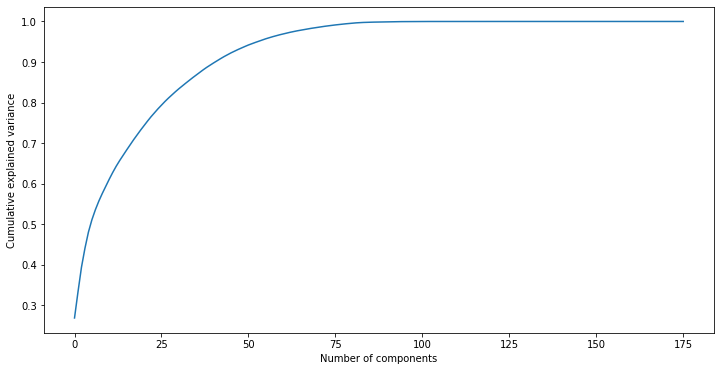

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 176)

principalComponents = pca.fit_transform(df.iloc[:, :-1].values)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()


In [11]:
pca = PCA(n_components = 165)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,166)]+['class']

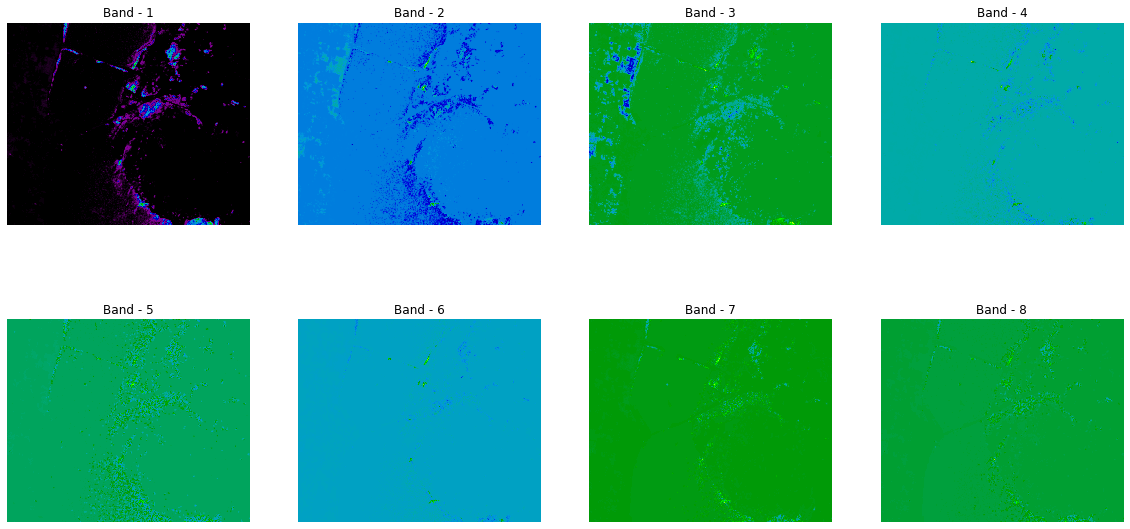

In [12]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(512, 614), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

#plt.savefig('IP_PCA_Bands.png')

In [13]:

x = q[q['class'] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, 'class'].values 

names = ['1',	'2', '3','4', '5', '6', '7', '8', '9', '10', '11', '12', '13' ]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

svm =  SVC(C = 105, kernel = 'rbf', cache_size = 10*1024)

svm.fit(X_train, y_train)

ypred = svm.predict(X_test)

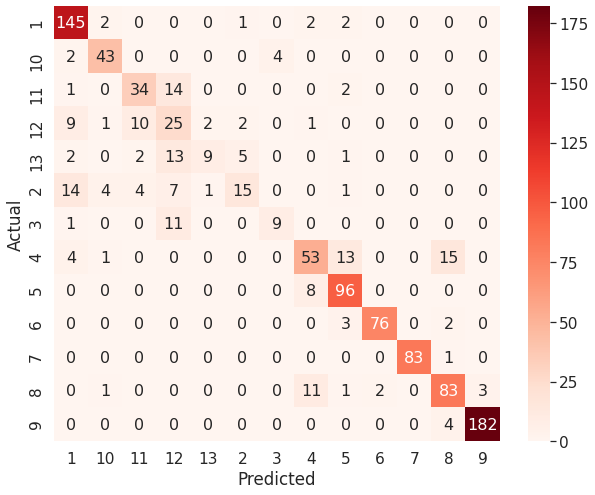

In [14]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)

In [15]:
print(classification_report(y_test, ypred, target_names = names))

              precision    recall  f1-score   support

           1       0.81      0.95      0.88       152
           2       0.83      0.88      0.85        49
           3       0.68      0.67      0.67        51
           4       0.36      0.50      0.42        50
           5       0.75      0.28      0.41        32
           6       0.65      0.33      0.43        46
           7       0.69      0.43      0.53        21
           8       0.71      0.62      0.66        86
           9       0.81      0.92      0.86       104
          10       0.97      0.94      0.96        81
          11       1.00      0.99      0.99        84
          12       0.79      0.82      0.81       101
          13       0.98      0.98      0.98       186

    accuracy                           0.82      1043
   macro avg       0.77      0.72      0.73      1043
weighted avg       0.82      0.82      0.81      1043



In [16]:
l=[]
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1)))

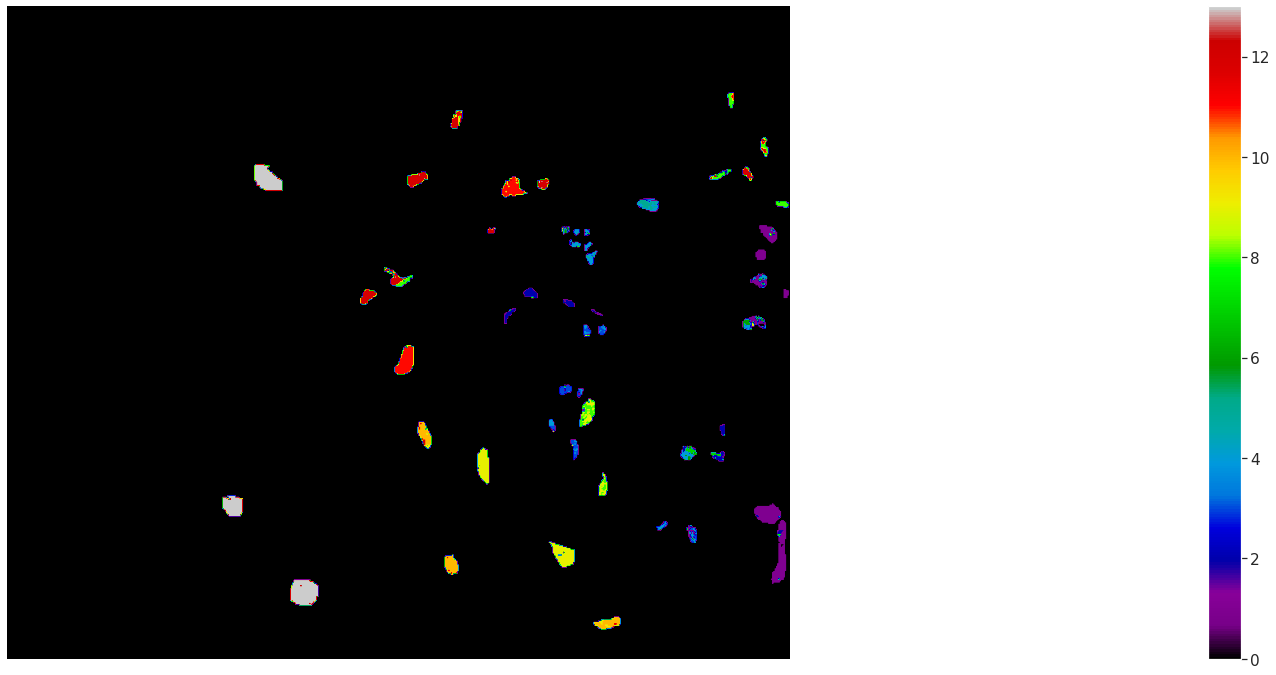

In [17]:
clmap = np.array(l).reshape(512, 614).astype('float')
plt.figure(figsize=(150, 12))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
#plt.savefig('IP_cmap.png')
plt.show()